# Feature Engineering: Feature Creation

### Read in text

In [2]:
import pandas as pd

data = pd.read_csv("../Support/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [6]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

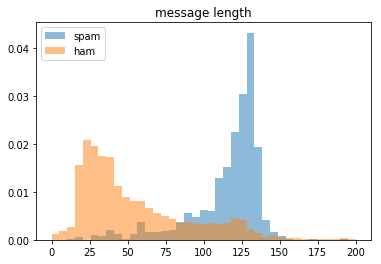

In [15]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'],
         bins, alpha=0.5, normed=True, label='spam')

plt.hist(data[data['label']=='ham']['body_len'],
         bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc="upper left")
plt.title("message length")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


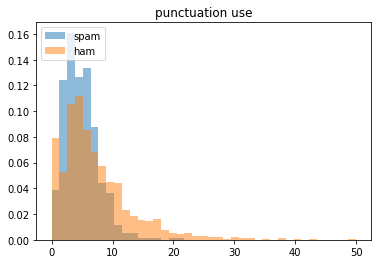

In [16]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'],
         bins, alpha=0.5, normed=True, label='spam')

plt.hist(data[data['label']=='ham']['punct%'],
         bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc="upper left")
plt.title("punctuation use")
plt.show()

message length seems to be a good feature 